# 베스트 모델 만들기 - 와인 사례
## 이진 분류
## 베스트 모델 업데이트하기 - 자동 중단, 그래프로 확인

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 입력
df_pre = pd.read_csv('./dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [4]:
# 모델 설정
model = Sequential([
    Dense(30, input_dim=12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [7]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [8]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [9]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 2.18106, saving model to ./model/final001-2.1811.hdf5

Epoch 00002: val_loss improved from 2.18106 to 1.25395, saving model to ./model/final002-1.2539.hdf5

Epoch 00003: val_loss improved from 1.25395 to 0.56431, saving model to ./model/final003-0.5643.hdf5

Epoch 00004: val_loss improved from 0.56431 to 0.41243, saving model to ./model/final004-0.4124.hdf5

Epoch 00005: val_loss improved from 0.41243 to 0.36086, saving model to ./model/final005-0.3609.hdf5

Epoch 00006: val_loss improved from 0.36086 to 0.30324, saving model to ./model/final006-0.3032.hdf5

Epoch 00007: val_loss improved from 0.30324 to 0.27234, saving model to ./model/final007-0.2723.hdf5

Epoch 00008: val_loss improved from 0.27234 to 0.25863, saving model to ./model/final008-0.2586.hdf5

Epoch 00009: val_loss improved from 0.25863 to 0.25153, saving model to ./model/final009-0.2515.hdf5

Epoch 00010: val_loss improved from 0.25153 to 0.24671, saving model to ./model/final


Epoch 00096: val_loss did not improve from 0.12946

Epoch 00097: val_loss improved from 0.12946 to 0.12809, saving model to ./model/final097-0.1281.hdf5

Epoch 00098: val_loss improved from 0.12809 to 0.12764, saving model to ./model/final098-0.1276.hdf5

Epoch 00099: val_loss improved from 0.12764 to 0.12625, saving model to ./model/final099-0.1262.hdf5

Epoch 00100: val_loss improved from 0.12625 to 0.12534, saving model to ./model/final100-0.1253.hdf5

Epoch 00101: val_loss did not improve from 0.12534

Epoch 00102: val_loss improved from 0.12534 to 0.12476, saving model to ./model/final102-0.1248.hdf5

Epoch 00103: val_loss improved from 0.12476 to 0.12408, saving model to ./model/final103-0.1241.hdf5

Epoch 00104: val_loss improved from 0.12408 to 0.12369, saving model to ./model/final104-0.1237.hdf5

Epoch 00105: val_loss did not improve from 0.12369

Epoch 00106: val_loss improved from 0.12369 to 0.12090, saving model to ./model/final106-0.1209.hdf5

Epoch 00107: val_loss did n


Epoch 00207: val_loss did not improve from 0.07536

Epoch 00208: val_loss improved from 0.07536 to 0.07515, saving model to ./model/final208-0.0752.hdf5

Epoch 00209: val_loss did not improve from 0.07515

Epoch 00210: val_loss improved from 0.07515 to 0.07497, saving model to ./model/final210-0.0750.hdf5

Epoch 00211: val_loss did not improve from 0.07497

Epoch 00212: val_loss improved from 0.07497 to 0.07379, saving model to ./model/final212-0.0738.hdf5

Epoch 00213: val_loss improved from 0.07379 to 0.07323, saving model to ./model/final213-0.0732.hdf5

Epoch 00214: val_loss improved from 0.07323 to 0.07313, saving model to ./model/final214-0.0731.hdf5

Epoch 00215: val_loss did not improve from 0.07313

Epoch 00216: val_loss did not improve from 0.07313

Epoch 00217: val_loss did not improve from 0.07313

Epoch 00218: val_loss did not improve from 0.07313

Epoch 00219: val_loss did not improve from 0.07313

Epoch 00220: val_loss improved from 0.07313 to 0.07206, saving model to .


Epoch 00340: val_loss improved from 0.06259 to 0.06238, saving model to ./model/final340-0.0624.hdf5

Epoch 00341: val_loss improved from 0.06238 to 0.06220, saving model to ./model/final341-0.0622.hdf5

Epoch 00342: val_loss did not improve from 0.06220

Epoch 00343: val_loss did not improve from 0.06220

Epoch 00344: val_loss did not improve from 0.06220

Epoch 00345: val_loss did not improve from 0.06220

Epoch 00346: val_loss did not improve from 0.06220

Epoch 00347: val_loss did not improve from 0.06220

Epoch 00348: val_loss did not improve from 0.06220

Epoch 00349: val_loss did not improve from 0.06220

Epoch 00350: val_loss did not improve from 0.06220

Epoch 00351: val_loss did not improve from 0.06220

Epoch 00352: val_loss did not improve from 0.06220

Epoch 00353: val_loss did not improve from 0.06220

Epoch 00354: val_loss did not improve from 0.06220

Epoch 00355: val_loss did not improve from 0.06220

Epoch 00356: val_loss did not improve from 0.06220

Epoch 00357: va


Epoch 00499: val_loss did not improve from 0.06071

Epoch 00500: val_loss did not improve from 0.06071

Epoch 00501: val_loss did not improve from 0.06071

Epoch 00502: val_loss did not improve from 0.06071

Epoch 00503: val_loss did not improve from 0.06071

Epoch 00504: val_loss did not improve from 0.06071

Epoch 00505: val_loss did not improve from 0.06071

Epoch 00506: val_loss did not improve from 0.06071

Epoch 00507: val_loss did not improve from 0.06071

Epoch 00508: val_loss did not improve from 0.06071

Epoch 00509: val_loss did not improve from 0.06071

Epoch 00510: val_loss did not improve from 0.06071

Epoch 00511: val_loss did not improve from 0.06071

Epoch 00512: val_loss did not improve from 0.06071

Epoch 00513: val_loss did not improve from 0.06071

Epoch 00514: val_loss did not improve from 0.06071

Epoch 00515: val_loss did not improve from 0.06071

Epoch 00516: val_loss did not improve from 0.06071

Epoch 00517: val_loss did not improve from 0.06071

Epoch 00518

In [12]:
model = load_model('model/final529-0.0606.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2)[1]))

6497/6497 - 0s - loss: 0.0483 - accuracy: 0.9886

 Accuracy: 0.9886


In [13]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [14]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

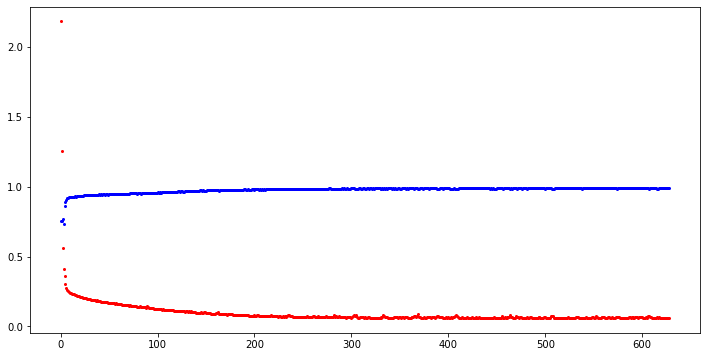

In [15]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()